In [1]:
import numpy as np
import sklearn as sk
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
os.getcwd()

'/Users/apple/Documents/gitcode/Anomaly_detection'

In [2]:
data_path = '/Users/apple/Downloads/data/'
data = 'Electricity_Theft_Data.csv'
print(os.path.join(data_path, data))
os.chdir(os.path.join(data_path))
os.getcwd()

# read data 
theft_df = pd.read_csv(os.path.join(data_path, data))
print(theft_df.shape)
theft_df.head()


/Users/apple/Downloads/data/Electricity_Theft_Data.csv
(9957, 367)


,CONS_NO,01/01/2015,02/01/2015,03/01/2015,04/01/2015,05/01/2015,06/01/2015,07/01/2015,08/01/2015,09/01/2015,...,23/12/2015,24/12/2015,25/12/2015,26/12/2015,27/12/2015,28/12/2015,29/12/2015,30/12/2015,31/12/2015,CHK_STATE
0,NaN,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,...,357.00,358.00,359.00,360.00,361.00,362.00,363.00,364.00,365.00,NaN
1,8.546920e+09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
2,6.177183e+08,1.12,1.73,3.34,2.77,3.50,2.86,1.25,1.12,1.51,...,17.31,15.95,17.00,32.05,28.72,31.11,28.47,16.70,14.96,1.0
3,7.222500e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
4,7.134080e+09,1.58,3.65,2.54,4.28,1.62,1.39,2.33,1.78,1.80,...,4.17,7.95,8.84,2.20,2.91,10.52,7.98,3.68,1.41,1.0


In [3]:
pd.DataFrame(theft_df.isnull().sum().sort_values(ascending= False)).head(5)


,0
17/10/2015,9956
20/10/2015,9956
10/10/2015,9956
11/10/2015,9956
12/10/2015,9956


Text(0.5, 1.0, 'Quantifying missing data')

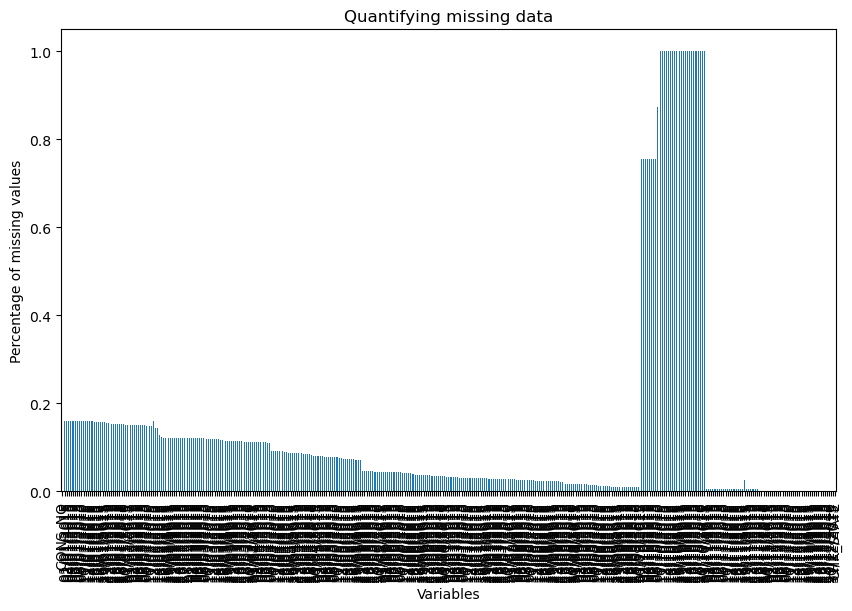

In [4]:
# the percentage of missing values visualization
theft_df.isnull().mean().plot.bar(figsize = (10,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

In [5]:
transformed_df = pd.melt(frame= theft_df, id_vars=["CONS_NO", "CHK_STATE"], var_name= "date" , value_name= "consumption")
transformed_df = transformed_df.dropna(subset= ['CONS_NO'])
transformed_df["CONS_NO"] = transformed_df["CONS_NO"].astype(int)
transformed_df["CHK_STATE"] = transformed_df["CHK_STATE"].astype(int)
transformed_df["date"] = pd.to_datetime(transformed_df["date"], infer_datetime_format=True, dayfirst= True)


In [15]:
for i in transformed_df.columns:
    print(i)

CONS_NO
CHK_STATE
date
consumption


In [18]:
transformed_df[transformed_df['CONS_NO'] == 7222500051]

,CONS_NO,CHK_STATE,date,consumption
3,7222500051,1,2015-01-01,NaN
9960,7222500051,1,2015-01-02,NaN
19917,7222500051,1,2015-01-03,NaN
29874,7222500051,1,2015-01-04,NaN
39831,7222500051,1,2015-01-05,NaN
...,...,...,...,...
3584523,7222500051,1,2015-12-27,0.0
3594480,7222500051,1,2015-12-28,0.0
3604437,7222500051,1,2015-12-29,0.0
3614394,7222500051,1,2015-12-30,0.0


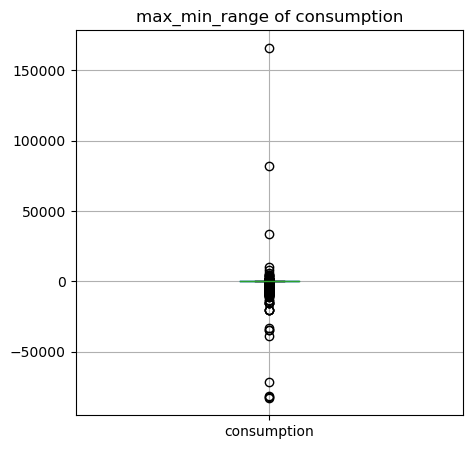

In [28]:
col_feature = ['consumption']

for col in col_feature:
    transformed_df.boxplot(col_feature, figsize=(5,5),grid = True)
    plt.title('max_min_range of consumption')
plt.show()

In [30]:
transformed_df['CONS_NO'].nunique()

9956

In [31]:
transformed_df.shape

(3633940, 4)